**Предположим, что мы любим авокадо и решили посмотреть динамику цен на данный продукт в США. Имеется следующий набор данных от Hass Avocado Board 🥑:**

- Date — дата
- AveragePrice — средняя цена одного авокадо
- Total Volume — количество проданных авокадо
- 4046 — количество проданных авокадо PLU* 4046
- 4225 — количество проданных авокадо PLU 4225
- 4770 — количество проданных авокадо PLU 4770
- Total Bags — всего упаковок
- Small Bags — маленькие упаковки
- Large Bags — большие
- XLarge Bags — очень большие
- type — обычный или органический
- year — год
- Region — город или регион the city or region of the observation
- *PLU — код товара (Product Lookup code)

В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. Предположим, что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib. dates as mdates
import plotly.express as px
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(font_scale = 1, style = "whitegrid", rc = {'figure.figsize':(16, 6)})

In [3]:
avocado_mean = pd.read_csv('avocado_mean.csv', parse_dates=['Date'], index_col='Date')
avocado_mean.head()

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037


In [4]:
avocado_mean.shape

(169, 1)

In [5]:
avocado_mean.dtypes

AveragePrice    float64
dtype: object

In [6]:
avocado_mean.isnull().sum()

AveragePrice    0
dtype: int64

## Задачи:

#### 1. Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

In [7]:
avocado_mean.rolling(window=3).mean().round(2).describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,167.0,1.407066,0.148028,1.17,1.31,1.38,1.465,1.85


#### 2. Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50).

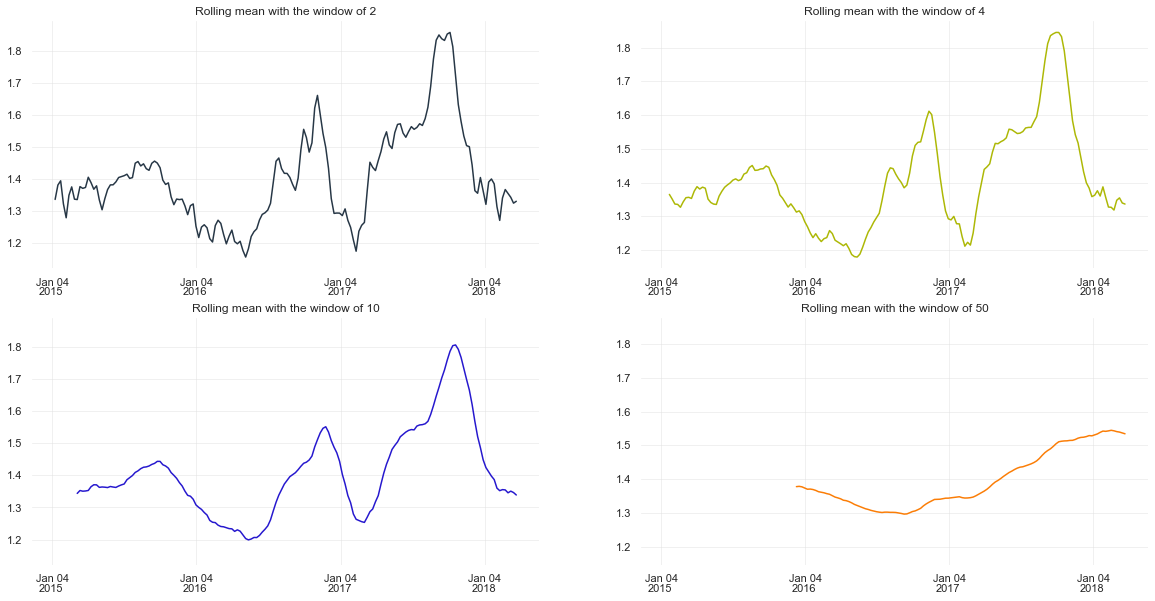

In [8]:
windows = [2, 4, 10, 50]
colors = ['#273746', '#ADB806', '#2618CE', '#FB7D06']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)
for window, ax, color in zip(windows, axes.flatten() , colors):
    ax.plot(avocado_mean.rolling(window=window).mean(), label=window, color=color)

for ax in axes.flatten():
    ax.set_frame_on(False)
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=1))
    ax.xaxis.set_minor_formatter(mdates. DateFormatter('\n%Y'))
    ax.grid(True, color='#e2e2e2', alpha=0.5)
    sns.despine()
    
for name, ax in zip(['2' , '4' , '10', '50'] , axes.flatten()):
    ax.set(title='Rolling mean with the window of {}'. format(name))
    ax.tick_params(labelbottom=True, which='both')

#### 3. Используйте агрегированные данные о ценах на авокадо и рассчитайте экспоненциальное скользящее среднее (используйте параметр span=2). Запишите результат в avocado_ewm.

In [9]:
avocado_ewm = avocado_mean.ewm(span=2).mean()
avocado_ewm.head()

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.353310
2015-01-18,1.379480
2015-01-25,1.391394
2015-02-01,1.294758


#### 4. Импортируйте полные данные. Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики. Числа округлите до трех знаков после точки.

In [10]:
avocado_full = pd.read_csv('avocado_full.csv', parse_dates=['Date'], index_col=0)
avocado_full.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [11]:
avocado_full.shape

(18249, 12)

In [12]:
avocado_full.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [13]:
organic_chicago = avocado_full.query('type == "organic" & region == "Chicago"')[['AveragePrice']]
organic_chicago.head()

,AveragePrice
Date,
2015-01-04,1.49
2015-01-11,1.79
2015-01-18,1.81
2015-01-25,1.83
2015-02-01,1.52


In [14]:
sma = organic_chicago.rolling(window=4).mean().round(3)
sma.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,166.0,1.745536,0.199933,1.295,1.59775,1.706,1.888,2.272


In [15]:
ewm = organic_chicago.ewm(span=4).mean().round(3)
ewm.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,169.0,1.743793,0.191864,1.295,1.603,1.692,1.886,2.27


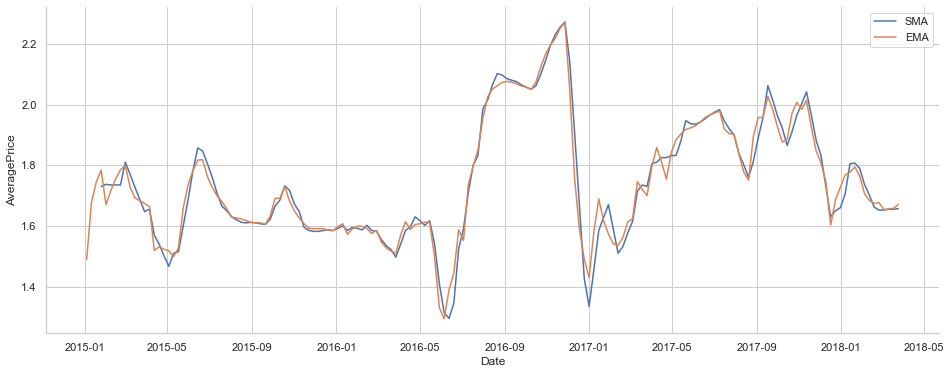

In [16]:
sns.lineplot(x='Date', y='AveragePrice', data=sma, label='SMA')
sns.lineplot(x='Date', y='AveragePrice', data=ewm, label='EMA')
sns.despine()